# 20 Simulated annealing homework Daniel Teeuwsen

In [3]:
import scipy.optimize
import numpy             as np
import matplotlib.pyplot as plt
%matplotlib inline
print(np.__version__)

1.19.2


#### Excercise 1

Consider the simulated annealing method from the lecture notes which found the global minimum of the function 
$$f(x) = \cos{x} + \cos{x\sqrt{2}} + \cos{x\sqrt{3}},$$
looking in the range $[0,50)$. 

We saw that the method didn't always work, and the method can become trapped in local minimum quite often.

- Adapt that program to find the global minimum 100 times. 
- Save each solution and make a historgram of the number of each solutions found during 100 trials of your simulation. 
- Did it find the correct global minimum very often? 

(This is a fairly long calculation to run the annealing 100 times.)

Change the method of choosing the step size to be drawn from a standard Cauchy distribution, then multiplied by the current temperature. Make a historgram of the solutions of 100 trials of your simulation. Did that help find  the solution more often? Why is that?

In [31]:
##  DO NOT RUN THIS CELL! IT TAKES TOO LONG (approx 5 minutes) ##

#   NEEDED ARRAYS RECORDED IN SUBSEQUENT CELL  #


#  ^
#  ^

def func(x):
    return np.cos(x)+np.cos(x*np.sqrt(2))+np.cos(x*np.sqrt(3))


def simulated_annealing() :
    global rng
    
    Xmin =  0
    Xmax = 50

    x = (Xmax-Xmin)*rng.random()+Xmin

    Tmax = 10
    Tmin = 1e-5
    tau = 1e4
    T = Tmax
    t = 0.0
    
    while (T>Tmin) :
        #dx = rng.standard_normal()       #graph 1
        dx = rng.standard_cauchy()*T      #graph 2
        #dx = rng.standard_cauchy()       #graph 3
        xp = x + dx
        if xp>=Xmin and xp<=Xmax :
            df = func(xp)-func(x)
            if df < 0 :
                x = xp
            elif rng.random() < np.exp(-df/T) :
                x = xp
                
        t += 1
        T = Tmax*np.exp(-t/tau)
    
    return x

rng = np.random.default_rng()
x_val_list = []

for i in range(100):
    x   = simulated_annealing()
    x_val_list.append(x)

#print(x_val_list)

KeyboardInterrupt: 

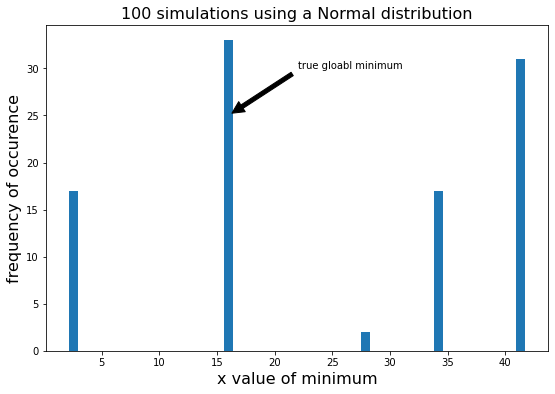

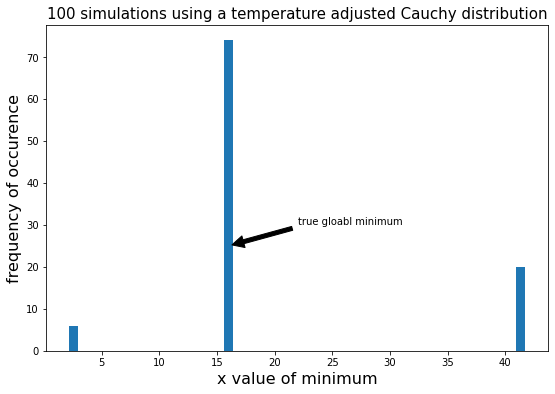

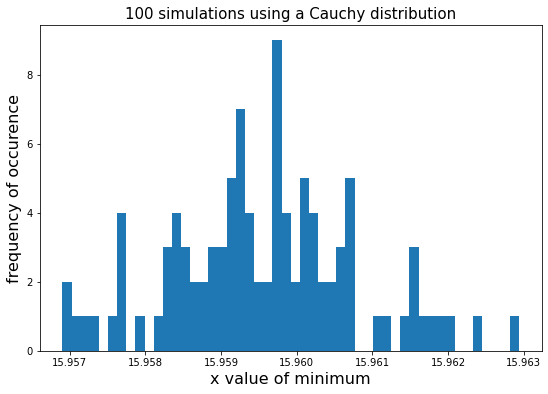

In [30]:
x_val_list1 = [15.958553128942432, 41.744951255912476, 41.74170565987318, 2.1541953489401737, 41.741465582311804, 2.152297461489162, 2.1563036410153664, 15.960861272422832, 41.74233629846624, 41.742714912734314, 41.74365693257945, 2.1571217477576465, 15.963151840056907, 15.960719153847132, 15.961165176623846, 41.744991070040896, 34.145418103807806, 2.1557233048956475, 15.962009477858203, 34.145933752447306, 41.741387093039805, 15.958311864647866, 41.74295001077062, 15.95780609112127, 15.959004248389324, 41.74375291562812, 15.959927994509096, 41.743298967334546, 2.155738617186093, 41.74460951990938, 2.1535642640235326, 15.958921393031904, 34.14613371927177, 34.14575761472281, 15.960762075709205, 2.1557955253298697, 34.14839482664387, 41.74516147655704, 2.1560705816563495, 15.961623873692536, 41.74216582942745, 2.1549038767364554, 15.95814525824961, 15.960932706188792, 41.74139206535742, 34.147168874795376, 34.14752106341422, 15.96128429794688, 15.95872915669357, 41.7426446350647, 41.74392838244923, 15.961259929498489, 34.145442213247414, 15.958542512786677, 15.96046871342441, 34.147711502833175, 41.74444925364229, 41.74384549966825, 34.145439498271955, 41.74071668208829, 34.148132790142064, 41.744995835699875, 34.14590652967915, 27.95977905225333, 2.1556514243603013, 27.961113563577484, 2.152794262079208, 15.961655409834353, 15.95893328061295, 41.74116449211686, 41.743285868666405, 34.14496841478704, 15.957238316994584, 15.961788217952355, 41.744373703417885, 41.74399375096678, 15.959018206570237, 15.960184300584155, 34.145440981498886, 15.959892329832646, 2.1556585351335027, 15.962449437995081, 41.744873169677014, 41.74394315697178, 15.960237102076487, 34.14781393996016, 2.1566504029065787, 15.961285733267612, 34.146164893088326, 41.74486208717812, 2.1549820683373495, 2.1550380108065115, 15.959263273927075, 15.956575295578908, 15.95862811546871, 41.743863495855166, 34.14488662110774, 41.74453903398031, 41.742098257938935, 2.1566512444343573]
plt.figure(figsize=(9,6))
plt.hist(x_val_list1,bins=50)
plt.title('100 simulations using a Normal distribution',fontsize=16)
plt.xlabel('x value of minimum',fontsize=16)
plt.ylabel('frequency of occurence',fontsize=16)
plt.annotate('true gloabl minimum', xy=(16, 25), xytext=(22, 30),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
plt.close()

x_val_list2 = [15.959560439097384, 41.742343749638536, 15.959428979177815, 15.956962464690026, 15.956945393686741, 41.74296836579427, 41.74089600834075, 15.957631637265884, 41.74322008037851, 15.960408464927124, 15.959145324709786, 15.957871500076921, 15.957698025905026, 15.958950052038219, 15.959671851847514, 41.74127473367835, 15.957802369817735, 15.95938616588575, 15.961263470021873, 15.960753291834806, 41.74200476588794, 15.960597049647763, 41.74436109604562, 15.959891589751862, 15.959415073075919, 41.7430277465138, 15.959777966969687, 2.1548186927037043, 2.1566723201332607, 15.960993148867633, 41.743681861715636, 15.960727150206557, 15.955815911356376, 15.959197325798945, 15.959725956993923, 15.959504234369968, 2.1558584876028126, 15.960226564878068, 41.74218725920684, 41.74161729937766, 15.960739154649966, 15.958560322488214, 15.959629565478284, 15.959838193245876, 15.961476580679966, 15.960924827379376, 15.958864535560629, 15.960084852326512, 15.959026654775988, 15.955615994095272, 15.957458393786474, 15.959559380811752, 15.959371655860288, 15.96087053434309, 15.957761150987322, 15.957193232863526, 2.15485321481319, 15.958909927691504, 41.74319606940529, 41.741882015548214, 15.959980592159825, 15.958931293131961, 41.744524518182395, 15.958307831395107, 41.74258790819729, 15.960077985503464, 15.96044245240043, 15.959429683916598, 15.96200944283485, 15.959568388503687, 41.745144035256715, 41.743831243177475, 15.957053699553944, 15.959796988984621, 15.957723356355173, 15.959914642570658, 2.157806434138135, 15.957238043660084, 15.95977499757414, 15.959655851435391, 15.960525540208787, 15.960394310792646, 41.74455589206156, 15.961600766699137, 41.74360739588334, 15.958733073005881, 15.960143476235181, 15.957243643352596, 15.961508763309443, 2.1555632059263763, 15.959368374746193, 41.74408194769976, 15.961022573819607, 15.959547167292857, 15.958799882559957, 15.957613999665073, 15.962257295103713, 15.961486497754954, 15.96011644397001, 15.956962727612845]
plt.figure(figsize=(9,6))
plt.hist(x_val_list2,bins=50)
plt.title('100 simulations using a temperature adjusted Cauchy distribution',fontsize=15)
plt.xlabel('x value of minimum',fontsize=16)
plt.ylabel('frequency of occurence',fontsize=16)
plt.annotate('true gloabl minimum', xy=(16, 25), xytext=(22, 30),arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()
plt.close()

x_val_list3 = [15.96053930116932, 15.959716289397548, 15.95884998591121, 15.959161059657225, 15.961589260507587, 15.959287270353713, 15.957095228452701, 15.960024431737192, 15.959218689759282, 15.960729422499668, 15.96056578306755, 15.958678584122302, 15.960755710604428, 15.958289386106005, 15.960251318313821, 15.957740172662284, 15.958385512781701, 15.959323662852071, 15.958834391253433, 15.95699465629552, 15.958458911117583, 15.96044773347668, 15.958406790018929, 15.959774337907254, 15.960123486797333, 15.959752937154617, 15.958238426237228, 15.957747666127856, 15.959916143602092, 15.961526766693225, 15.960633984224899, 15.960663361719739, 15.959775453406474, 15.96012698786719, 15.96121657953207, 15.958744403557564, 15.957724255045417, 15.959026628396888, 15.959223493245306, 15.959350622454993, 15.959764120161815, 15.960258894226673, 15.958326947760051, 15.959736304983709, 15.96177752027904, 15.958699479812687, 15.957955932952059, 15.959831253192693, 15.961055193035552, 15.959255598129895, 15.95965417170943, 15.95985908597864, 15.95944484645376, 15.959167440520526, 15.959731928889054, 15.96021270645185, 15.957294696536106, 15.958545982999587, 15.959320669771662, 15.95918460959379, 15.958463679433144, 15.960690024065663, 15.959753895864647, 15.960307667656597, 15.957547505873954, 15.961399102195848, 15.96042068261009, 15.962007442025532, 15.960716332844955, 15.958869618184194, 15.959486413601986, 15.961649067694585, 15.958489533937428, 15.959267746943143, 15.958116624730367, 15.959189113686874, 15.959793109243577, 15.959249883428074, 15.958548678816426, 15.960100469509202, 15.960118924098827, 15.95917861396448, 15.959038198989777, 15.959639048401652, 15.959917905272903, 15.958860795547928, 15.960076322158963, 15.960027656805034, 15.957722722405695, 15.95923039558138, 15.962934225329871, 15.961598855350656, 15.960392795988378, 15.95716002796562, 15.961956801975317, 15.962332910029563, 15.95901833709221, 15.960191248706707, 15.959324204681522, 15.95690594221615]
plt.figure(figsize=(9,6))
plt.hist(x_val_list3,bins=50)
plt.title('100 simulations using a Cauchy distribution',fontsize=15)
plt.xlabel('x value of minimum',fontsize=16)
plt.ylabel('frequency of occurence',fontsize=16)
plt.show()
plt.close()

<font color="blue">Answer:</font> <font color="green"> True Mininmum:  f(15.95947266)=-2.61258

Using the normal distribution the correct solution was found about 1/3 of the time, the second smallest value about 1/3 of the time,  the third and fourth smallest values about 15% of the time each and the fourth smallest about 3% of the time.

Using the temperature adjusted cauchy distribution the correct minimum was found about 3/4 of the time, the second best solution was found 1/5 of the time and the third best solution about 1/20 of the time.

Clearly the second method resulted in a significant improvement and found the true minimum much more frequently. This is because the standard cauchy distribution gives on average smaller values for the step size. 

When using a Cauchy distribution for dx and not multiplying by the temperature the algorithm converged to within 0.05 of the correct value of the minimum every single simulation
</font>


#### Excercise 2
Adapt the simluated annealing to solve the two dimensional <a href="https://en.wikipedia.org/wiki/Rosenbrock_function">Rosenbrock function</a> from an earlier assignment. Search in the range $[-50,50]$ for both dimensions. Which distribution will you use?

There is no need to keep track of many attempts. Just keep running the Jupyter cell manually until you see the correct answer appear.

In [202]:
#  I used the Cauchy distribution

def f(x,y, args):
    a, b = args
    return (a-x)*(a-x)+b*(y-x*x)*(y-x*x)

constants = (1,100)

def simulated_annealing_2() :
    global rng
    
    varmin = -50
    varmax = +50

    x = (varmax-varmin)*rng.random()+varmin
    y = (varmax-varmin)*rng.random()+varmin

    Tmax = 10
    Tmin = 1e-5
    tau = 1e4
    T = Tmax
    t = 0.0
    
    while (T>Tmin) :    
        dx = rng.standard_cauchy()*T
        dy = rng.standard_cauchy()*T
        xp = x + dx
        yp = y + dy
        
        if xp>varmin and xp<varmax :
            if yp>varmin and yp<varmax :
                df = f(xp,yp,constants)-f(x,y,constants)
                if df < 0 :
                    x = xp
                    y = yp
                elif rng.random() < np.exp(-df/T) :
                    x = xp
                    y = yp
                
        t += 1
        T = Tmax*np.exp(-t/tau)
    
    return x, y

rng = np.random.default_rng()

x, y   = simulated_annealing_2()
print(f"The minimum occurs at (" +str(x) + ',' +str(y))
print(f"The value at x  is      : {f(x,y,constants):6.5f}")
print()
print('Analytically the minimum should be 0 at the point (a,a^2), Examples:')
print(f(1,1,constants))
print(f(2,4,(2,5)))
print(f(3,9,(3,1)))

The minimum occurs at (1.0020644061755697,1.0041565623143685
The value at x  is      : 0.00000

Analytically the minimum should be 0 at the point (a,a^2), Examples:
0
0
0


#### Excercise 3
This time try to find the minimum of the <a href="http://www.sfu.ca/~ssurjano/egg.html">eggholder function.</a> Search in the range $[-512,+512]$, but start at $x=y=0$. This is a very long way form the minimum at $$f(x=512,y=404.2319)=-959.6407$$ You should raise the inital temperature quite a bit, and maybe increase the length $\tau$, to get the solution over the many minimums between your starting guess and the final solution.



The eggholder function:

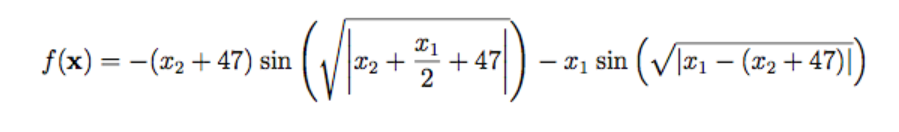

In [203]:
# cell takes 1 or 2 minutes to run

def f(x,y):
    return -(y+47)*np.sin(np.sqrt(abs(y+x/2+47))) - x*np.sin(np.sqrt(abs(x-(y+47))))


varmin = -512
varmax = +512

x = 0.
y = 0.

Tmax = 1e6
Tmin = 1e-6
tau = 5*1e4
T = Tmax
t = 0.



while (T>Tmin) :    
        dx = rng.standard_cauchy()
        dy = rng.standard_cauchy()
        xp = x + dx
        yp = y + dy

        if xp>varmin and xp<varmax :
            if yp>varmin and yp<varmax :
                df = f(xp,yp)-f(x,y)
                if df < 0 :
                    x = xp
                    y = yp
                elif rng.random() < np.exp(-df/T) :
                    x = xp
                    y = yp

        t += 1
        T = Tmax*np.exp(-t/tau)
print(x)
print(y)
print()

511.9999640418788
404.2086140132399



<font color="blue">Answer</font>

#### Excercise 4

Try solving the eggholder function with `scipy.optimize.dual_annealing` with and without the option 
```python
no_local_search=True
```
Do you feel the `scipy` method worked better or worse than your program above?

In [210]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return -(x2+47)*np.sin(np.sqrt(abs(x2+x1/2+47))) - x1*np.sin(np.sqrt(abs(x1-(x2+47))))


print('Without local search')
result = scipy.optimize.dual_annealing(f,
                                       bounds=[(-512,512),(-512,512)],
                                       maxiter=5000,
                                       no_local_search=True,
                                       )
print(result)
print('With local search')
result = scipy.optimize.dual_annealing(f,
                                       bounds=[(-512,512),(-512,512)],
                                       maxiter=5000,
                                       no_local_search=False,
                                       )
print(result)


Without local search
     fun: -959.6404340733843
 message: ['Maximum number of iteration reached']
    nfev: 20005
    nhev: 0
     nit: 5000
    njev: 0
  status: 0
 success: True
       x: array([511.99993246, 404.23173876])
With local search
     fun: -959.6406627208471
 message: ['Maximum number of iteration reached']
    nfev: 48334
    nhev: 0
     nit: 5000
    njev: 9443
  status: 0
 success: True
       x: array([512.        , 404.23180691])


<font color="blue">Answer</font>  <font color="green"> The scipy method seems to work better than my programmed solution. The scipy function is a bit more consistent. This is to be expected as it is a professionally created library.</font> 


#### Excercise 5

Use `scipy.optimize.differential_evolution` to solve the eggholder problem. You may need to increase the maximum number of iterations, and the population size to get semi-consistent results.

In [215]:
def f(x):
    x1 = x[0]
    x2 = x[1]
    return -(x2+47)*np.sin(np.sqrt(abs(x2+x1/2+47))) - x1*np.sin(np.sqrt(abs(x1-(x2+47))))

result = scipy.optimize.differential_evolution(f,
                                               bounds=[(-512,512),(-512,512)],
                                               strategy='best1exp',
                                               maxiter=10**5,
                                               popsize=120,
                                               tol=0.0001,
                                               mutation=(1,1))
print(result)

# By introducing some mutation the algorithm does a better job exploring the solution space and 
# yields consistent results for this particular problem

print(f([result.x[0],result.x[1]]))

     fun: -959.6406627208403
     jac: array([-3.38557997,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 28812
     nit: 119
 success: True
       x: array([512.        , 404.23180815])
-959.6406627208403


In [214]:
# Cell takes about 1 or 2 mins #

# Shows consistency of algorithm #

Ntrials = 10
sol_array = np.zeros((2,Ntrials),float)

for i in range(Ntrials):
    
    result = scipy.optimize.differential_evolution(f,
                                               bounds=[(-512,512),(-512,512)],
                                               strategy='best1exp',
                                               maxiter=10**5,
                                               popsize=120,
                                               tol=0.0001,
                                               mutation=(1,1))
    sol_array[0][i] = result.x[0]
    sol_array[1][i] = result.x[1]
    
print(sol_array)

[[512.        ]
 [404.23180405]]
